In [14]:
import numpy as np
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
### This part just makes it easier to do live updates from the sheet
### This fetches data from the google sheet and writes to the 'EnergyDistributionData.csv'
### However I do not want to put my service key on github, so if you want to run this just ask for the service key
### NOTE for tutors - this section is not necessary, this git repo will contain the data - just run the next cell
scope = [
   'https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
#Name of our Service Account Key
google_key_file = 'service_key.json'
credentials = ServiceAccountCredentials.from_json_keyfile_name(google_key_file, scope)
gc = gspread.authorize(credentials)
spreadsheet_key = '11yF4VFlMYCyfHdulolGM9P_yIwRX9icS-Zv27uayVKY'
sheet_name = 'data_export_exp3'
#Opening the worksheet by using Worksheet ID
workbook = gc.open_by_key(spreadsheet_key)
#Selecting which sheet to pulling the data
sheet = workbook.worksheet(sheet_name)
values = sheet.get_all_values()
#Pulling the data and transform it to the data frame
df = pd.DataFrame(values[1:], columns = values[0])
# df[['v_b', 'i_b','v_g','i_g','v_y','i_y']] = df[['v_b', 'i_b','v_g','i_g','v_y','i_y']].astype(float)
# df.dtypes
for column in df.columns:
    df[column]= df[column].astype('float64') 
df.to_csv('EnergyDistributionData.csv',index=False)

In [16]:
#Reading the data
df = pd.read_csv('EnergyDistributionData.csv')

In [17]:
# used to generate voltage distribution between i = 0 and i = max
# dist = np.linspace(-0.325,-0.112,20)
# for x in dist: print(round(x,3))

<Figure size 432x288 with 0 Axes>

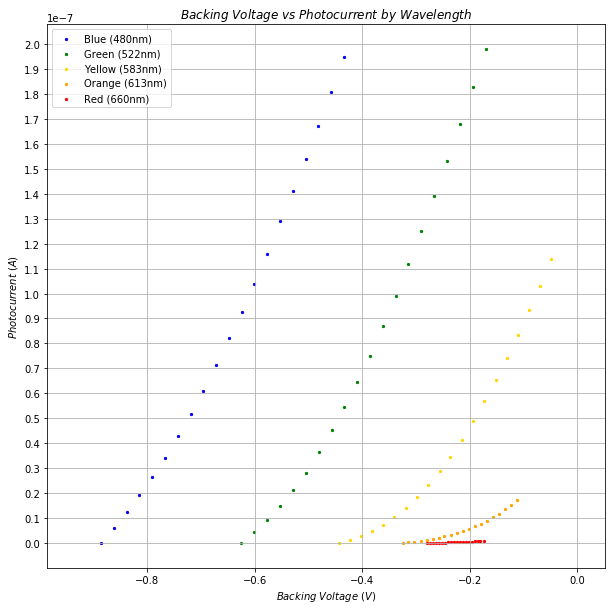

In [18]:
#initial plot of data
plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(df.v_b, df.i_b,color='blue', label="Blue (480nm)", marker='.', s=20)
# plt.scatter(df.v_b, df.i_predicted_b,color='black', label="Blue (480nm)", marker='x', s=20)
plt.scatter(df.v_g,df.i_g, color='green',label="Green (522nm)",marker='.', s=20)
plt.scatter(df.v_y,df.i_y,color='gold',label="Yellow (583nm)",marker='.', s=20)
plt.scatter(df.v_o,df.i_o,color='orange',label="Orange (613nm)",marker='.', s=20)
plt.scatter(df.v_r,df.i_r,color='red',label="Red (660nm)",marker='.', s=20)
plt.title(r'$Backing \ Voltage \ vs \ Photocurrent \ by \ Wavelength$')
plt.xlabel(r'$Backing \ Voltage \ (V)$')
plt.ylabel(r'$Photocurrent \ (A)$')
plt.legend(loc='upper left')
# plt.show()
axes = plt.gca()
axes.set_ylim(-1e-8,max(df.i_g)+ 1e-8)
axes.set_xlim(min(df.v_b)-0.1,max(df.v_y)+0.1)
plt.yticks(np.arange(0,210e-9,10e-9))
plt.grid()
plt.show()

In [19]:
# linear fit
from scipy.stats import linregress
# blue linear fit (x, y)
regress_b = linregress(df.v_b,df.i_b)
regress_fn_b = lambda x: regress_b.slope*x + regress_b.intercept
# green
regress_g = linregress(df.v_g,df.i_g)
regress_fn_g = lambda x: regress_g.slope*x + regress_g.intercept
# yellow
regress_y = linregress(df.v_y,df.i_y)
regress_fn_y = lambda x: regress_y.slope*x + regress_y.intercept
# orange
regress_o = linregress(df.v_o,df.i_o)
regress_fn_o = lambda x: regress_o.slope*x + regress_o.intercept
# red
regress_r = linregress(df.v_r,df.i_r)
regress_fn_r = lambda x: regress_r.slope*x + regress_r.intercept

<Figure size 432x288 with 0 Axes>

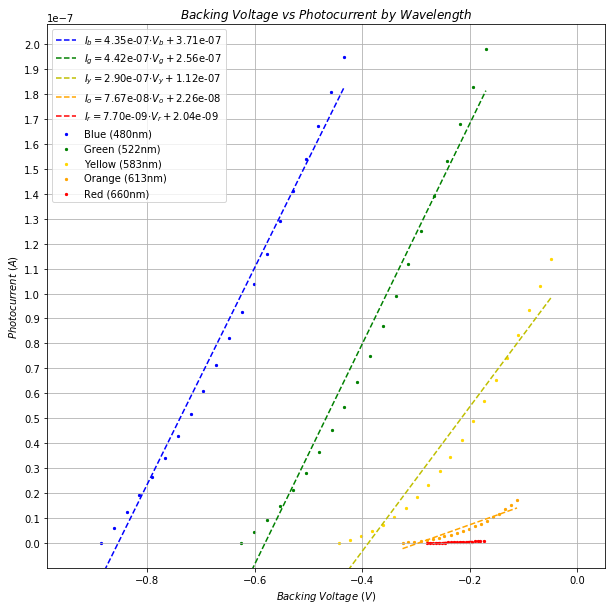

In [31]:
plt.clf()
plt.figure(figsize=(10,10))
#blue
plt.scatter(df.v_b, df.i_b,color='blue', label="Blue (480nm)", marker='.', s=20)
label_blue = r"$I_{b} = $"+"{:.2e}".format(regress_b.slope) + "$\cdot V_b + $" +"{:.2e}".format(regress_b.intercept)
plt.plot(df.v_b, regress_fn_b(df.v_b), 'b--', label=label_blue)

#green
plt.scatter(df.v_g,df.i_g, color='green',label="Green (522nm)",marker='.', s=20)
label_green = r"$I_{g} = $"+"{:.2e}".format(regress_g.slope) + "$\cdot V_g + $" +"{:.2e}".format(regress_g.intercept)
plt.plot(df.v_g, regress_fn_g(df.v_g), 'g--', label=label_green)

#yellow
plt.scatter(df.v_y,df.i_y,color='gold',label="Yellow (583nm)",marker='.', s=20)
label_yellow = r"$I_{y} = $"+"{:.2e}".format(regress_y.slope) + "$\cdot V_y + $" +"{:.2e}".format(regress_y.intercept)
plt.plot(df.v_y, regress_fn_y(df.v_y), 'y--', label=label_yellow)

#orange
plt.scatter(df.v_o,df.i_o,color='orange',label="Orange (613nm)",marker='.', s=20)
label_orange = r"$I_{o} = $"+"{:.2e}".format(regress_o.slope) + "$\cdot V_o + $" +"{:.2e}".format(regress_o.intercept)
plt.plot(df.v_o, regress_fn_o(df.v_o), '--',color='orange', label=label_orange)

#red
plt.scatter(df.v_r,df.i_r,color='red',label="Red (660nm)",marker='.', s=20)
label_red = r"$I_{r} = $"+"{:.2e}".format(regress_r.slope) + "$\cdot V_r + $" +"{:.2e}".format(regress_r.intercept)
plt.plot(df.v_r, regress_fn_r(df.v_r), 'r--', label=label_red)
plt.title(r'$Backing \ Voltage \ vs \ Photocurrent \ by \ Wavelength$')
plt.xlabel(r'$Backing \ Voltage \ (V)$')
plt.ylabel(r'$Photocurrent \ (A)$')
plt.legend(loc='upper left')
axes = plt.gca()
axes.set_ylim(-1e-8,max(df.i_g)+ 1e-8)
axes.set_xlim(min(df.v_b)-0.1,max(df.v_y)+0.1)
plt.yticks(np.arange(0,210e-9,10e-9))
plt.grid()
plt.show()

In [23]:
from IPython.display import HTML, display
import tabulate
table = [["Sun",696000,1989100000],
         ["Earth",6371,5973.6],
         ["Moon",1737,73.5],
         ["Mars",3390,641.85]]


Sun,696000,1.9891e+09
Earth,6371,5973.6
Moon,1737,73.5
Mars,3390,641.85


In [27]:
regression_data = [regress_b,regress_g,regress_y,regress_o,regress_r]
colours = ['Blue','Green','Yellow','Orange','Red']
table = [['Colour','Slope','Intercept','R-Value','P-value','Standard-Error']]
for i,item in enumerate(regression_data):
    item_data = [colours[i],"{:.2e}".format(item.slope),"{:.2e}".format(item.intercept),item.rvalue,"{:.2e}".format(item.pvalue),"{:.2e}".format(item.stderr)]
    table.append(item_data)
display(HTML(tabulate.tabulate(table, tablefmt='html')))   

Colour,Slope,Intercept,R-Value,P-value,Standard-Error
Blue,4.35e-07,3.71e-07,0.9932410651664692,2.73e-18,1.20e-08
Green,4.42e-07,2.56e-07,0.9876872751978405,5.91e-16,1.65e-08
Yellow,2.90e-07,1.12e-07,0.9722061331555337,8.50e-13,1.64e-08
Orange,7.67e-08,2.26e-08,0.9619403596807292,1.39e-11,5.13e-09
Red,7.70e-09,2.04e-09,0.9741432117031575,4.47e-13,4.21e-10
